# Inspector

Inspecting the generated ASTs.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import json
import os
import joblib
from operator import itemgetter
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.colors as mcolors
import collections

In [126]:
DATA_PATH = 'data/code-sample/graph/'

## Load data

### Features

In [127]:
feats = np.load(DATA_PATH+'feats.npy')
feats.shape

(35, 102)

### Graph

In [128]:
G_data = json.load(open(DATA_PATH + "G.json"))
G = json_graph.node_link_graph(G_data)
print(G.number_of_nodes(), G.number_of_edges())

35 39


### Node id map

In [129]:
node_id_map = json.load(open(DATA_PATH + "id_map.json"))

### File map

In [130]:
file_map = json.load(open(DATA_PATH + "file_map.json"))

### Source-code line map

In [131]:
source_map = json.load(open(DATA_PATH + "source_map.json"))

### Parse map

In [132]:
parse_map = json.load(open(DATA_PATH + "parse_map.json"))

### AST Token maps

In [133]:
ast_symbol_dict = joblib.load(filename='ast_symbol_dict')
inv_ast_symbol_dict = joblib.load(filename='inv_ast_symbol_dict')

In [134]:
from _ast import *
import sys

MOD_SYMBOLS = [Module, Interactive, Expression, Suite]
STMT_SYMBOLS = [FunctionDef, AsyncFunctionDef, ClassDef, Return, Delete, \
                Assign, AugAssign, For, AsyncFor, While, If, With, AsyncWith, \
                Raise, Try, Assert, Import, ImportFrom, Global, Nonlocal, \
                Expr, Pass, Break, Continue]
EXPR_SYMBOLS = [BoolOp, BinOp, UnaryOp, Lambda, IfExp, Dict, Set, ListComp, \
                SetComp, DictComp, GeneratorExp, Await, Yield, YieldFrom, \
                Compare, Call, Num, Str, FormattedValue, JoinedStr, Bytes, \
                NameConstant, Ellipsis, Constant, Attribute, Subscript, \
                Starred, Name, List, Tuple]
EXPR_CONTENT_SYMBOLS = [Load, Store, Del, AugLoad, AugStore, Param]
SLICE_SYMBOLS = [Slice, ExtSlice, Index]
BOOLOP_SYMBOLS = [And, Or]
OPERATOR_SYMBOLS = [Add, Sub, Mult, MatMult, Div, Mod, Pow, LShift, RShift, \
                    BitOr, BitXor, BitAnd, FloorDiv]
UNARYOP_SYMBOLS = [Invert, Not, UAdd, USub]
CMPOP_SYMBOLS = [Eq, NotEq, Lt, LtE, Gt, GtE, Is, IsNot, In, NotIn]
COMPREHENSION_SYMBOLS = [comprehension]
EXCEPT_SYMBOLS = [excepthandler, ExceptHandler]
ARG_SYMBOLS = [arguments, arg, keyword]
IMPORT_SYMBOLS = [alias, withitem]
PYTHON_SYMBOLS = MOD_SYMBOLS + STMT_SYMBOLS + EXPR_SYMBOLS \
               + EXPR_CONTENT_SYMBOLS + SLICE_SYMBOLS \
               + BOOLOP_SYMBOLS + OPERATOR_SYMBOLS \
               + UNARYOP_SYMBOLS + CMPOP_SYMBOLS \
               + EXCEPT_SYMBOLS + ARG_SYMBOLS + IMPORT_SYMBOLS \
               + COMPREHENSION_SYMBOLS
AST_SYMBOL_DICT = dict((v, k) for (k, v) in enumerate(PYTHON_SYMBOLS))

In [135]:
AST_SYMBOL_DICT

{_ast.Module: 0,
 _ast.Interactive: 1,
 _ast.Expression: 2,
 _ast.Suite: 3,
 _ast.FunctionDef: 4,
 _ast.AsyncFunctionDef: 5,
 _ast.ClassDef: 6,
 _ast.Return: 7,
 _ast.Delete: 8,
 _ast.Assign: 9,
 _ast.AugAssign: 10,
 _ast.For: 11,
 _ast.AsyncFor: 12,
 _ast.While: 13,
 _ast.If: 14,
 _ast.With: 15,
 _ast.AsyncWith: 16,
 _ast.Raise: 17,
 _ast.Try: 18,
 _ast.Assert: 19,
 _ast.Import: 20,
 _ast.ImportFrom: 21,
 _ast.Global: 22,
 _ast.Nonlocal: 23,
 _ast.Expr: 24,
 _ast.Pass: 25,
 _ast.Break: 26,
 _ast.Continue: 27,
 _ast.BoolOp: 28,
 _ast.BinOp: 29,
 _ast.UnaryOp: 30,
 _ast.Lambda: 31,
 _ast.IfExp: 32,
 _ast.Dict: 33,
 _ast.Set: 34,
 _ast.ListComp: 35,
 _ast.SetComp: 36,
 _ast.DictComp: 37,
 _ast.GeneratorExp: 38,
 _ast.Await: 39,
 _ast.Yield: 40,
 _ast.YieldFrom: 41,
 _ast.Compare: 42,
 _ast.Call: 43,
 _ast.Num: 44,
 _ast.Str: 45,
 _ast.FormattedValue: 46,
 _ast.JoinedStr: 47,
 _ast.Bytes: 48,
 _ast.NameConstant: 49,
 _ast.Ellipsis: 50,
 _ast.Constant: 51,
 _ast.Attribute: 52,
 _ast.Subscr

---

## Helpers

In [136]:
def get_name_from_token(token, show_id=True):
    tokenid  = np.nonzero(token)[0][0]
    return get_name_from_token_id(tokenid, show_id=show_id)

In [137]:
def get_name_from_token_id(tokenid, show_id = True):
    strtoken = inv_ast_symbol_dict.get(tokenid)
    
    if strtoken is None:
        if tokenid == 104:
            strtoken = "Root Node"
        else:
            strtoken = "<Unknown token>"
    else:
        strtoken = strtoken.__name__
        
    if show_id is True:
        strtoken += " " + str(tokenid) 
        
    return strtoken

In [138]:
def inspect_node_recursive(node_id, G, feats, depth=0):
    '''
    Recursively print neighbouring node tokens
    '''
    neighbours = list(G.adj[node_id])
    for n in neighbours:
        strtoken = get_name_from_token(feats[n])
        if strtoken=="Root Node 104":
            print(n)
        print(" "*depth, strtoken)
        if depth < 2:
            inspect_node_recursive(n, G, feats, depth+1)

In [139]:
# Example usage
inspect_node_recursive(0, G=G, feats=feats)

 Expr 24
  Module 0
   Expr 24
   Import 20
   FunctionDef 4
   If 14
  Str 45
   Expr 24
 Import 20
  Module 0
   Expr 24
   Import 20
   FunctionDef 4
   If 14
  alias 101
   Import 20
 FunctionDef 4
  Module 0
   Expr 24
   Import 20
   FunctionDef 4
   If 14
  arguments 98
   FunctionDef 4
  Assign 9
   FunctionDef 4
   Name 55
   Num 44
  Expr 24
   FunctionDef 4
   Call 43
  Assign 9
   FunctionDef 4
   Name 55
   Num 44
  Delete 8
   FunctionDef 4
   Name 55
 If 14
  Module 0
   Expr 24
   Import 20
   FunctionDef 4
   If 14
  Compare 42
   If 14
   Name 55
   Eq 86
   Str 45
  Assign 9
   If 14
   Name 55
   Num 44
  Expr 24
   If 14
   Call 43
  Delete 8
   If 14
   Name 55


In [140]:
def draw_egonet(node_id=1009, radius=2):
    node_and_degree = G.degree()
    hub_ego = nx.ego_graph(G, node_id, radius=radius)
    # Draw graph
    pos = nx.spring_layout(hub_ego)

    neighbours = list(hub_ego.nodes())
    labels = {}
    for n in neighbours:
        labels[n] = get_name_from_token(feats[n], show_id=False)

    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, labels=labels)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[node_id], node_size=300, node_color='r')
    plt.show()
    return neighbours

/Users/Dylan/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


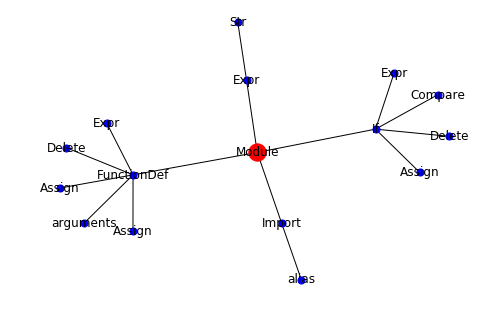

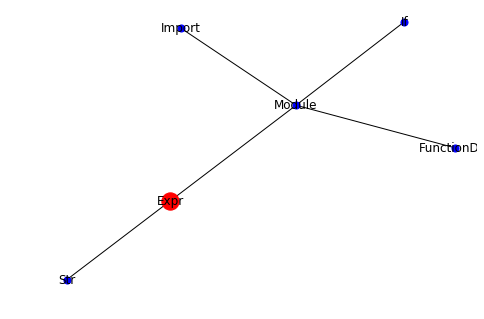

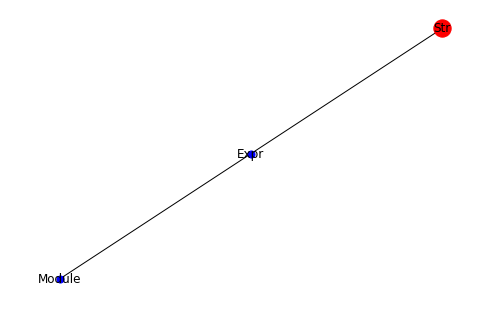

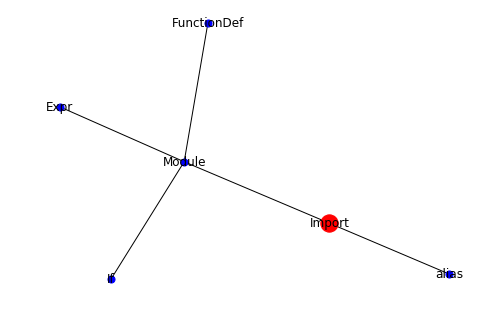

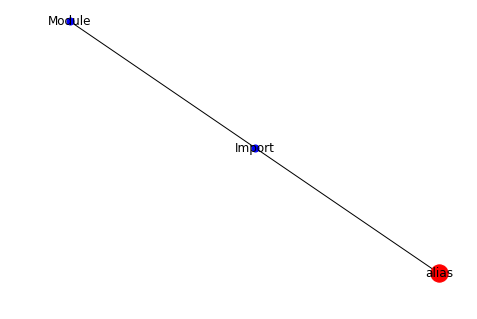

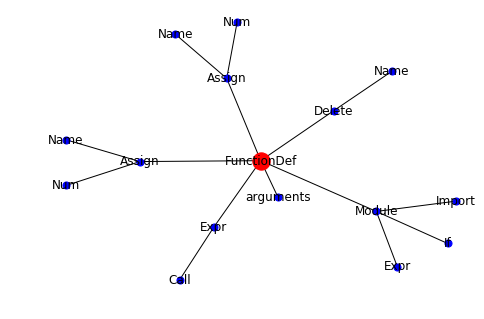

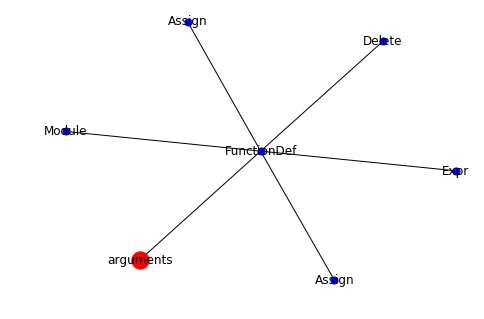

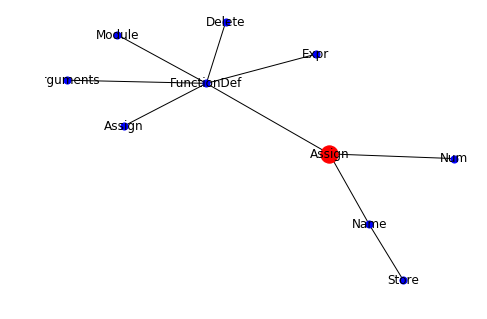

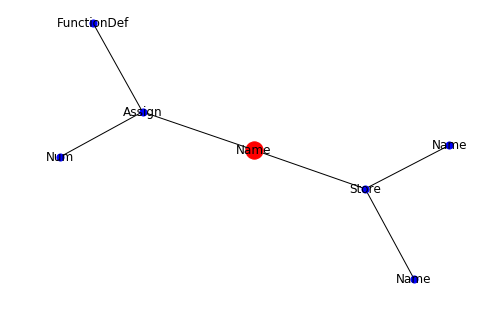

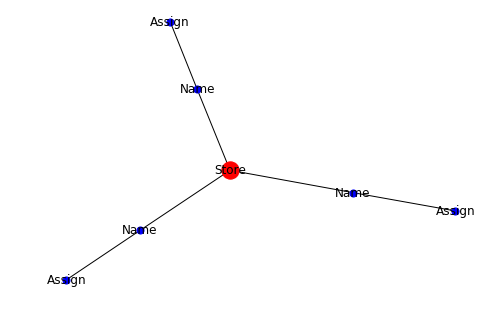

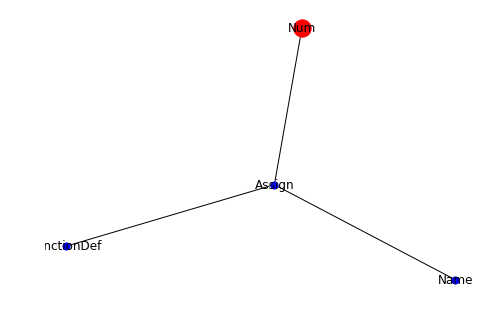

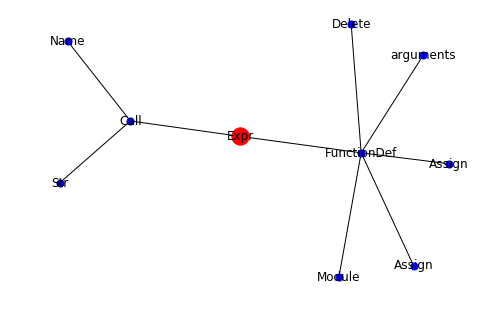

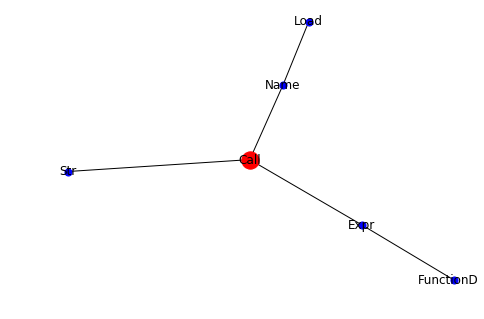

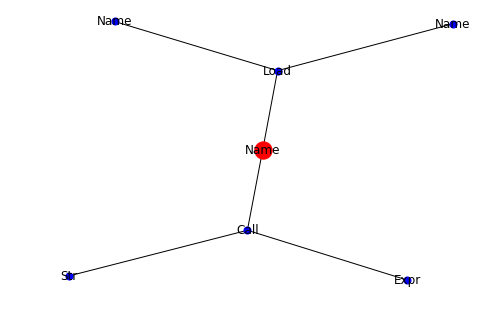

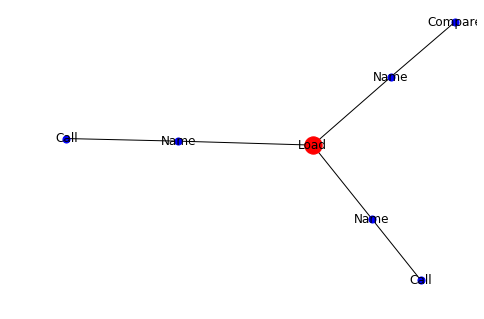

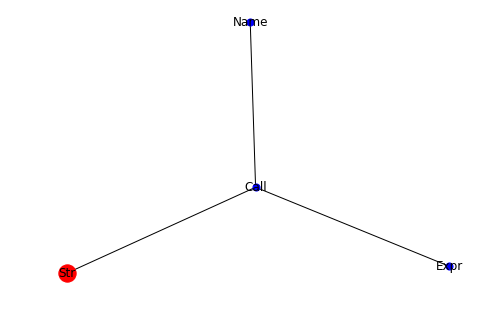

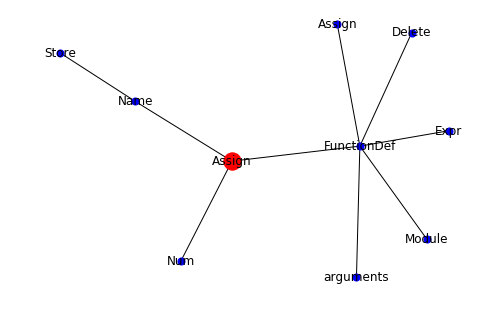

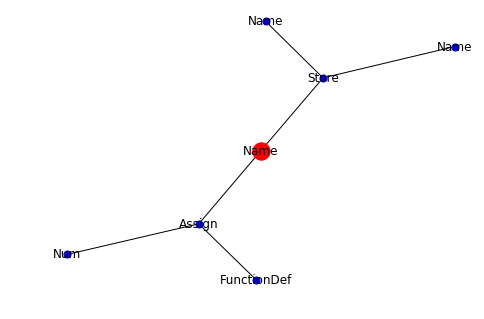

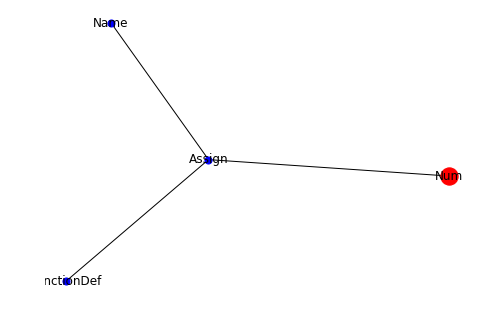

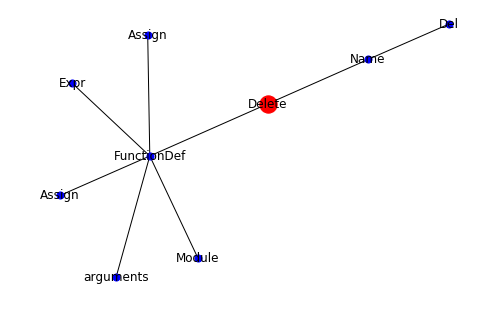

In [141]:
# Example usage 
for i in range(20):
    draw_egonet(i, radius=2)

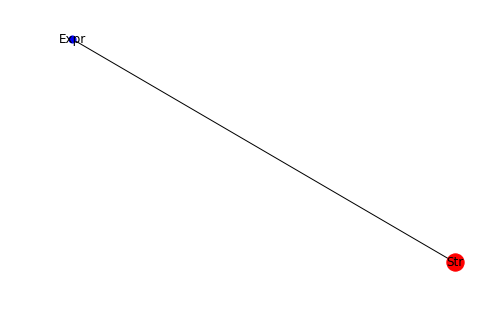

[1, 2]

In [144]:
example_root_node_id = 2
draw_egonet(example_root_node_id, radius=1)

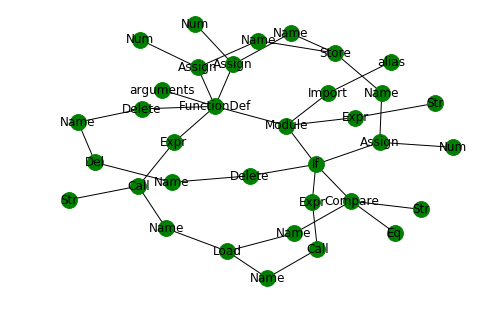

In [145]:
if G.number_of_nodes() < 100:
    labels = {}
    for n in G.nodes():
        labels[n] = get_name_from_token(feats[n], show_id=False)
    pos = nx.layout.kamada_kawai_layout(G)
    nx.draw(G, pos, node_color='g', node_size=250, with_labels=True, labels=labels)

In [146]:
def get_code_token(node_id):
    top_node, lineno, col_offset = source_map[str(node_id)]
    
    print("node_id =",node_id, "; top_node =",top_node)
    print("token_type =", get_name_from_token(feats[G.nodes()][node_id], show_id=False))


    ast_filename = file_map[str(top_node)]
    source_filename = parse_map[ast_filename]
    
    print()
    
    with open(source_filename[3:]) as f:
        for i, line in enumerate(f):
            if i+1 == lineno:
                print("Line", lineno, ":") 
                print("`", line.strip('\n'),"`")
                if col_offset != -1:
                    l = 0
                    for ls in line.split(): 
                        l += len(ls)
                        if l > col_offset:
                            print("\nToken =",ls)
                            break

In [148]:
get_code_token(1)

node_id = 1 ; top_node = 0
token_type = Expr

Line 3 :
` """ `


---

## Graph analysis

In [149]:
def draw_color_graph(G, measure):
    plt.figure(figsize=(15,15))
    pos = nx.layout.kamada_kawai_layout(G)
    labels = {}
    for n in G.nodes():
        labels[n] = get_name_from_token(feats[n], show_id=False)
    measures = color_list = [v for v in measure(G).values()]
    measure_name = measure.__name__
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=500, cmap=plt.cm.plasma, 
                                   node_color=measures,
                                   nodelist=G.nodes())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    pos_labels = {}
    x_off, y_off = 0.05, 0.05

    for k, v in pos.items():
        pos_labels[k] = (v[0]+x_off, v[1]+y_off)
    
    nx.draw_networkx_labels(G,pos_labels,labels,font_size=16)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

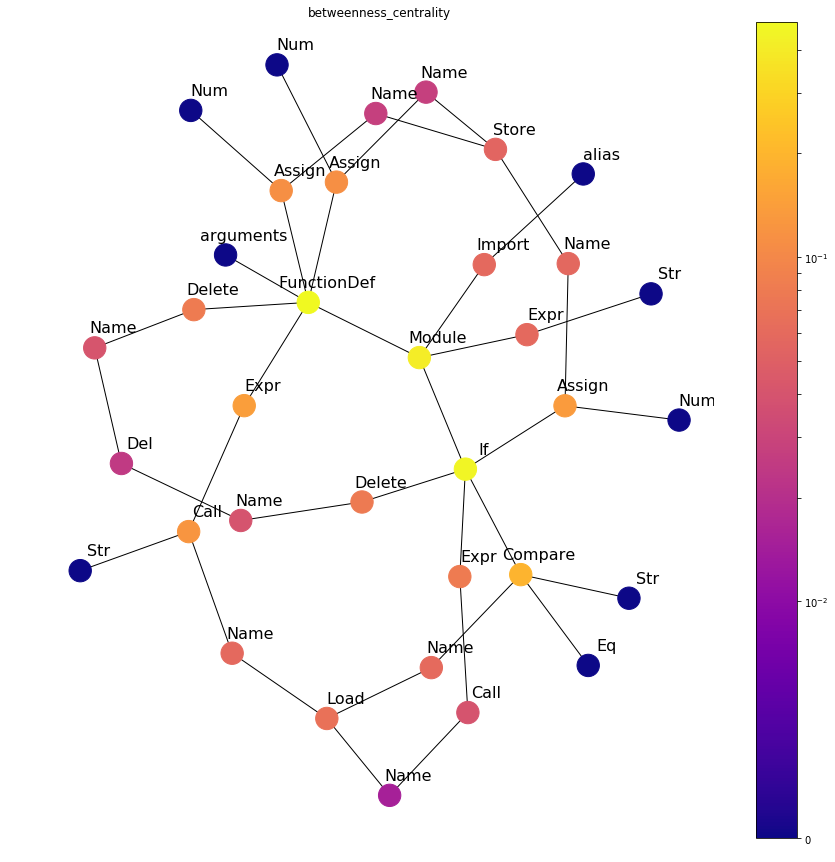

In [150]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.betweenness_centrality)

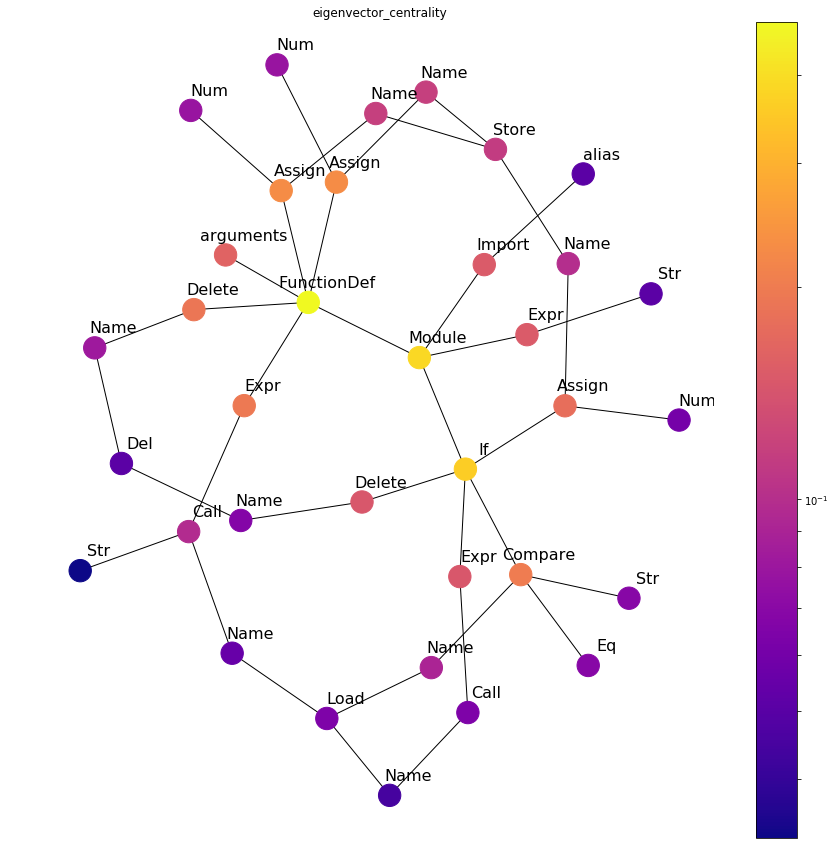

In [151]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.eigenvector_centrality)

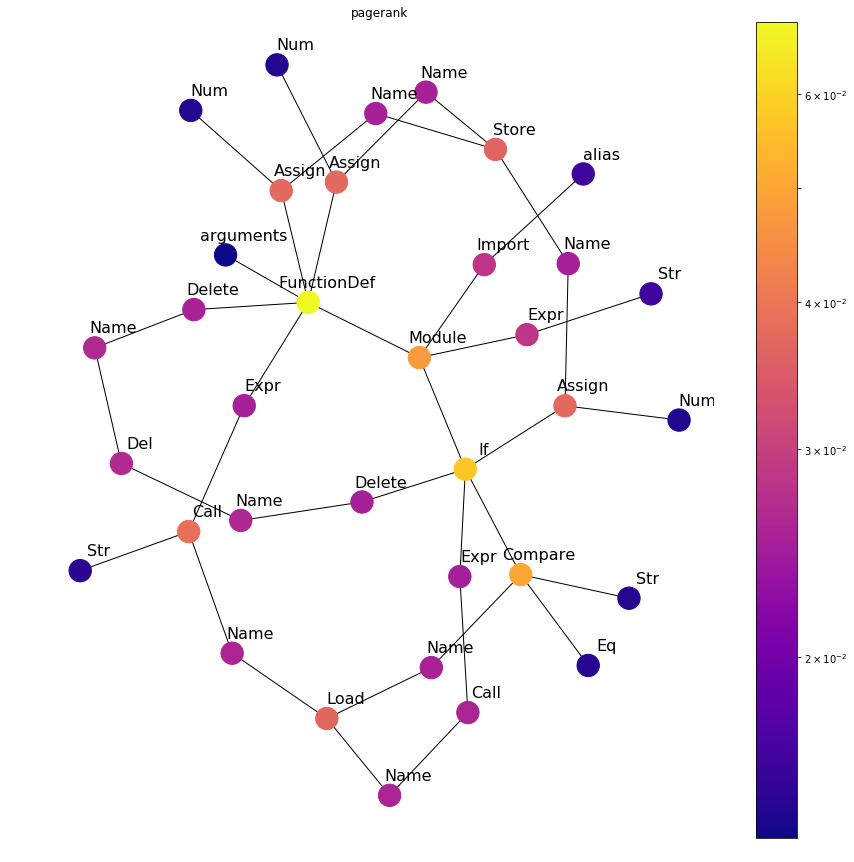

In [152]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.pagerank)

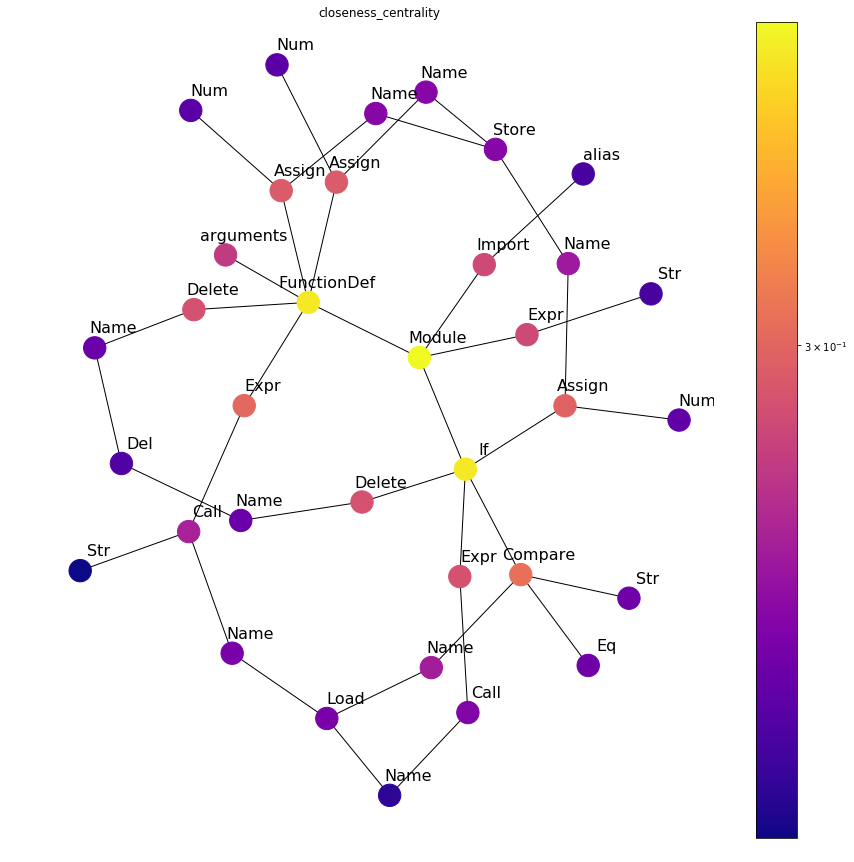

In [153]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.closeness_centrality)

---

## Graph Metrics

### Node degree distribution

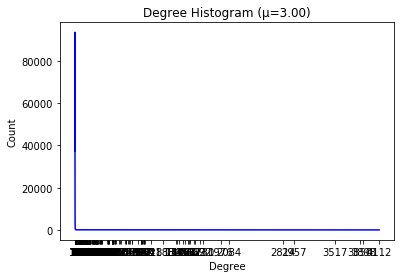

In [124]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

mean_degree = sum(degree_sequence)/G.number_of_nodes()


fig, ax = plt.subplots()
plt.plot(deg, cnt, color='b')

plt.title("Degree Histogram (µ="+"{:.2f}".format(mean_degree)+")")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [125]:
degreeCount

Counter({4112: 1,
         3898: 1,
         3850: 1,
         3517: 1,
         2957: 1,
         2814: 1,
         2084: 1,
         1976: 1,
         1730: 1,
         1692: 1,
         1623: 1,
         1612: 1,
         1551: 1,
         1537: 1,
         1532: 1,
         1483: 1,
         1466: 1,
         1406: 1,
         1384: 1,
         1361: 1,
         1188: 1,
         1028: 1,
         954: 1,
         940: 1,
         932: 1,
         927: 1,
         907: 1,
         902: 1,
         894: 1,
         893: 1,
         892: 1,
         853: 1,
         769: 1,
         768: 1,
         743: 1,
         738: 1,
         726: 1,
         688: 1,
         686: 1,
         685: 1,
         631: 1,
         608: 1,
         600: 1,
         558: 1,
         550: 1,
         539: 1,
         531: 1,
         521: 1,
         518: 1,
         515: 1,
         510: 1,
         509: 1,
         508: 1,
         507: 1,
         502: 1,
         468: 1,
         462: 1,
         

### Diameter

In [93]:
nx.diameter(G)

KeyboardInterrupt: 

### Eccentricity

In [122]:
ecc_count = collections.Counter(nx.eccentricity(G).values())
deg, cnt = zip(*ecc_count.items())

mean_ecc = sum(nx.eccentricity(G).values())/G.number_of_nodes()

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Eccentricity Histogram (µ="+"{:.2f}".format(mean_ecc)+")")
plt.ylabel("Count")
plt.xlabel("Eccentricity")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

KeyboardInterrupt: 